### Markowitz's Curse

행렬 $C$는 단지 $V$의 표준화된 버전이므로 $C^{-1}$에 대한 결론은 $\omega^*$를 계산하고자 사용되는 $V^{-1}$에 대해서도 적용된다. 포트폴리오 내 증권의 상관관계가 매우 높을 때 $-1 < \rho < 0$ 또는 $0 < \rho < 1$, $C$는 높은 조건 수를 갖고, $V^{-1}$의 값은 무한대로 접근한다. 이는 포트폴리오 최적화 맥락에서 문제를 야기하는데 $\omega^*$가 $V^{-1}$에 의존하고, $\rho \approx 0$가 아니면 **블록 최대화 문제**에 대해 불안정한 해가 예상되기 때문이다. 즉 마코위츠의 해는 단지 $\rho \sim 0$인 경우에만 수치적으로 안정성이 보장되는데 바로 이 경우는 역설적으로 마코위츠를 필요로 하지 않는 경우다. 마코위츠를 필요로 하는 이유는 $\rho \ne 0$인 경우를 다루기 위한 것인데 마코위츠를 필요로 할수록 $\omega^*$의 추정치가 수치적으로 불안정하다. 이것이 마코위츠의 저주다.

Lopez de Prado(2016)는 계층적 리스크 패리티(HRP, Hierarchical Risk Parity)로 불리는 머신러닝 기반 자산 배분 방법을 도입했다. HRP는 샘플 외 문제가 덜하므로 마코위츠와 단순한 배분보다 성과가 더 좋다. HRP의 목적은 최적 배분을 제공하기 위한 것이 아니라 단지 머신러닝 접근법의 잠재력을 증명하기 위한 것이다. 사실 HRP는 비목 구성상 샘플 내에서 존재적이라도 샘플 외에서 마코위츠보다 성과가 좋다. 다음 절에서는 표준 평균–분산 최적화의 성과를 상대적으로 능가하기 쉬운 이유를 더욱 분석한다.


### Signal as a Source of Covariance Instability

2장에서 잠움과 관련된 공분산 불안정성이 $N/T$ 비율에 의해 규제된 것을 봤다. 왜냐하면 **마르첸코–파스퇴르 분포**(Marcenko–Pastur distribution)의 하한인 $\lambda_{\text{min}}$은 $N/T$가 커질수록 작아지는 반면, 상한인 $\lambda_{\text{max}}$는 $N/T$가 커질수록 증가하기 때문이다. 이번 절에서는 데이터의 구조(신호)에 의해 야기되는 공분산 불안정성의 다른 원인을 다룬다. $2 \times 2$ 행렬의 예에서 봤듯이, $\rho = N/2$와 무관하게 독립적으로 행렬의 조건 수를 규제한다.   신호에 의한 불안정성은 구조적이며, 더 많은 관찰값을 샘플링해 줄일 수 없다.

신호가 평균–분산 최적화를 불안정하게 만드는 방법에 대한 직관적인 설명이 있다. 상관 행렬이 항등 행렬(identity matrix)인 경우, 고유값 함수는 수평선이 되며 조건 수는 1이다. 그러한 이상적인 경우를 제외하고 조건 수는 불규칙한 상관 구조로 인해 영향을 받는다. 특히 금융의 경우 투자 유니버스의 나머지 부분보다 증권의 부분 집합이 그들 사이에 더 큰 상관관계를 보일 때 그 부분 집합은 상관 행렬 내에서 군집을 형성한다. 군집은 계층적 관계의 결과로 자연스럽게 나타난다. $K$개의 증권이 군집을 형성할 때 이들이 공통의 고유 벡터에 더 많이 노출된다는 이는 관련 고유값이 더 많은 양의 분산을 설명한다는 것을 의미한다. 그러나 상관 행렬의 대각합이 정확히 $N$이기 때문에 고유값은 해당 군집의 다른 $K - 1$개의 고유값을 희생해야만 증가할 수 있으며, 따라서 조건 수가 1보다 커진다. 결과적으로 군집 내 상관관계가 클수록 조건 수는 더 높아진다. 이러한 불안정성의 근원은 구별되며 $N = T - 1$과는 무관하다.

이 직관을 수치로 예시해 보자. 아래 코드는 서로 다른 수의 블록, 블록 크기, 블록 내 상관관계의 블록–대각 상관 행렬을 형성하는 방법을 보여 준다. 그림에는 크기가 동일한 블록 2개로 구성된 $4 \times 4$ 크기의 블록 대각선 행렬이 표시된다. 여기서 블록 내 상관관계는 0.5이고, 외부 블록 상관관계는 0이다. 이 블록 구조 때문에 조건 수는 1이 아니라 3이다. (1) 블록 하나를 더 크게 만들거나 (2) 블록 내 상관관계를 증가시키면 조건 수가 상승한다. 그 이유는 두 경우 모두 한 고유 벡터가 나머지 고유 벡터보다 더 많은 분산을 설명하기 때문이다. 예를 들어, 한 블록의 크기를 3으로 늘리고 다른 블록의 크기를 1로 줄이면 조건 수는 4가 된다. 대신 블록 내 상관관계를 0.75로 증가시키면 조건 수는 7이 된다. 크기 $500 \times 500$의 블록–대각 상관 행렬과 2개의 동일한 크기의 블록이 있으며, 여기서 블록 내 상관관계 0.5이면 조건 수가 25이며, 다시 500개의 고유 벡터를 가진 결과 대부분의 분산이 단지 2로 설명된다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from FinancialMachineLearning.generator.pca_blocks import formBlockMatrix

corr0 = formBlockMatrix(nBlocks = 2, bSize = 2, bCorr = 0.5)
eVal, eVec = np.linalg.eigh(corr0)

In [2]:
print(max(eVal) / min(eVal))

3.0


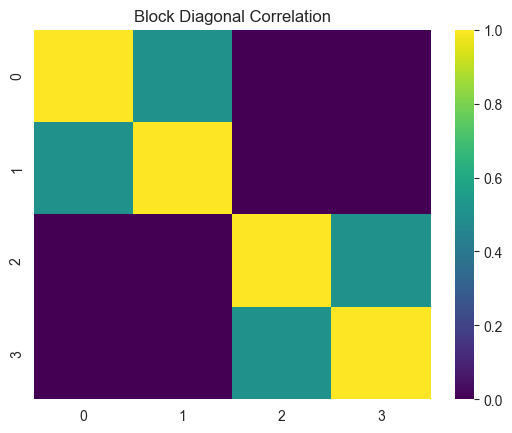

In [3]:
sns.heatmap(corr0, cmap = 'viridis')
plt.title('Block Diagonal Correlation')
plt.show()

아래의 코드는 두 블록 중 한 블록에서만 블록 내 상관관계를 내리는 것이 조건 수를 줄이지 않는다는 것을 보여 준다. 그 이유는 극단적인 고유값이 지배적인 블록에 의해 발생하기 때문이다. 따라서 높은 조건 수는 단지 한 군집에만 의해 발생할 수 있더라도 이는 전체 상관 행렬에 영향을 미친다. 이러한 관찰은 중요한 시사점을 갖고 있다. 마코위츠 해의 불안정성은 상관 행렬 내 소수의 지배적인 군집에 기인할 수 있다. 지배적인 군집을 별도로 최적화함으로써 그러한 불안정성을 억제할 수 있으며, 따라서 불안정성이 포트폴리오 전체로 확산되는 것을 방지할 수 있다.

In [4]:
from scipy.linalg import block_diag

corr0 = block_diag(
    formBlockMatrix(nBlocks = 1, bSize = 2, bCorr = 0.5)
)
corr1 = formBlockMatrix(
    nBlocks = 1, bSize = 2, bCorr = 0
)

In [5]:
corr2 = block_diag(corr0, corr1) # 지배적인 블록을 먼저 최적화한 뒤, 추가적인 최적화를 진행

In [6]:
eVal, eVec = np.linalg.eigh(corr2)

In [7]:
print(max(eVal) / min(eVal))

3.0


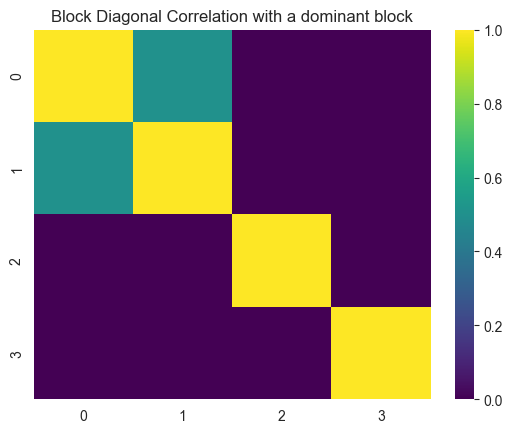

In [8]:
sns.heatmap(corr2, cmap = 'viridis')
plt.title('Block Diagonal Correlation with a dominant block')
plt.show()